# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


Text(0.5, 1.0, 'Transito según día de la semana')

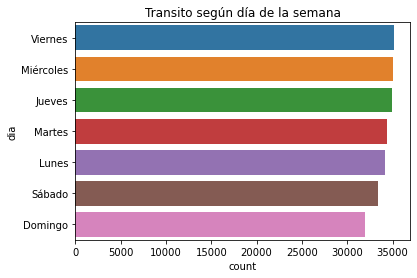

In [11]:
import seaborn as sns

sns.countplot(y = 'dia', data = dataset, order = dataset['dia'].value_counts().index)
plt.title('Transito según día de la semana')

In [12]:
#Vemos los horarios/dias más concurridos
dia_sem = dataset.groupby('dia').sum('cantidad_pasos').sort_values(by='cantidad_pasos', ascending=False)

In [13]:
dia_sem.head(7)

,hora_fin,cantidad_pasos
dia,,
Viernes,417612,7647272
Jueves,414391,7302169
Miércoles,416664,7125526
Martes,408222,6865551
Lunes,405556,6691387
Sábado,391320,6441715
Domingo,382723,5791961


In [14]:
#Los días mas concurridos de la semana son los viernes, seguidos por los jueves y los miercoles.
#Los días menos transcurridos son los domingos y los sábados. 
#Tiene sentido ya que coincide con la jornada laboral

In [15]:
horario = dataset.groupby('hora_fin').sum('cantidad_pasos').sort_values(by='cantidad_pasos', ascending=False)

In [16]:
horario.head(24)

,cantidad_pasos
hora_fin,
18,3115036
19,3071455
14,3005578
17,2993721
16,2969568
15,2933388
13,2907990
12,2729369
20,2661885


In [27]:
#Los horarios más transcurridos son las 18 hs seguido por las 19 y las 14.
#Los horarios menos transcurridos son los horarios de madrugada (4/5/3.00 am)

Text(0.5, 1.0, 'Tipos de vehículo que transitan')

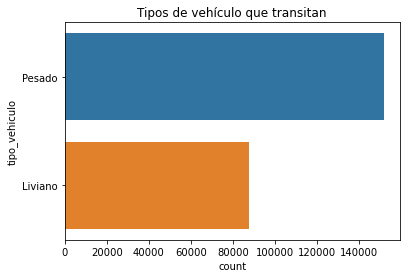

In [18]:
sns.countplot(y = 'tipo_vehiculo', data = dataset, order = dataset['tipo_vehiculo'].value_counts().index) #Ver con Seaborn es más fácil!
plt.title('Tipos de vehículo que transitan')

In [39]:
#La mayoría de los vehiculos que pasan son vehiculos pesados.
#Podría coincidir con que esos días los camiones salen a trabajar?

Text(0.5, 1.0, 'Sentido transitado')

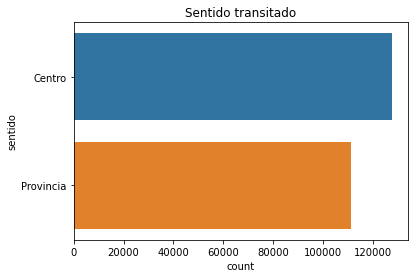

In [20]:
sns.countplot(y = 'sentido', data = dataset, order = dataset['sentido'].value_counts().index) #Ver con Seaborn es más fácil!
plt.title('Sentido transitado')

In [ ]:
#El sentido más transitado es "centro". Sin embargo, no encontramos una diferencia muy grande

In [21]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [22]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [23]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


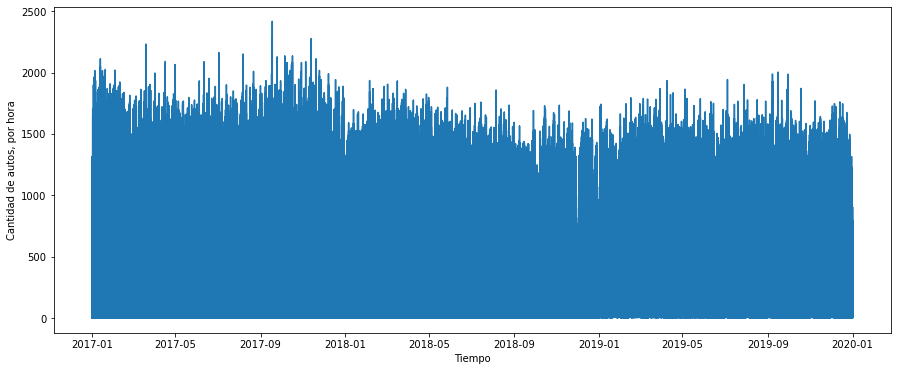

In [24]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [25]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


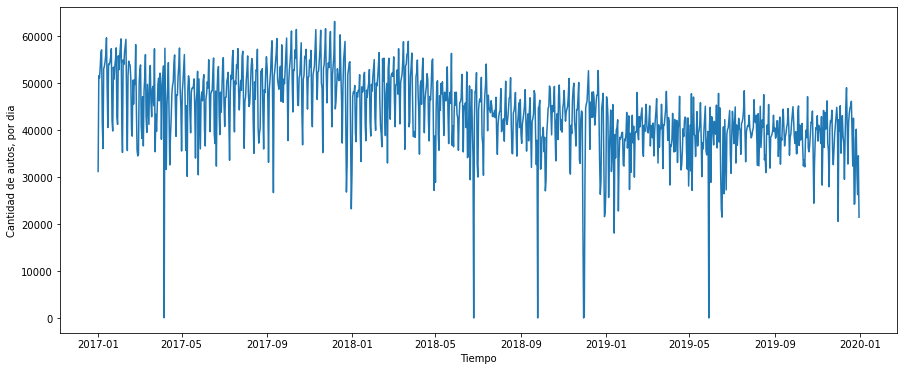

In [26]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

#### Observaciones:
No parece tratarse de una serie estacionaria, sino que necesitaríamos transformarla para poder modelar. 
Se podría tratar de una serie decreciente (tiene tendencia)
Por otro lado, parecería haber outliers (tendremos que trabajar con ellos). 
Vemos que hay estacionalidad (se presenta en ciclo).

In [27]:
diario.isna().sum() #No tenemos valores faltantes

cantidad_pasos    0
dtype: int64

In [28]:
#Vamos a probar que pasa si resampleamos por mes 
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
diario.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


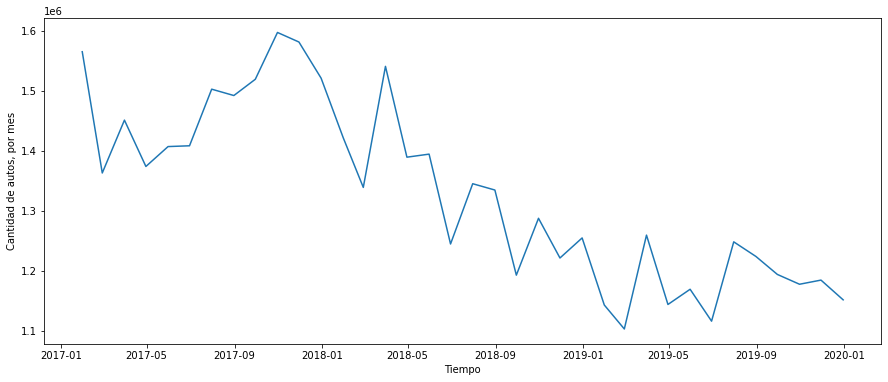

In [29]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Vemos que la cantidad de autos fue descendiendo en los ultimos años. 
Esto podria  deberse a una tendencia de las personas a quedarse cada vez mas tiempo en sus casas, trabajo remoto creciente con los avances tecnologicos, o un componente que encontramos importante es que al estar utilizando el medio de pago "efectivo", podemos considerar que muchos conductores migraron al telepase, ṕor ejemplo, por las ofertas ofrecidas por este.
Un dato a destacar es que a partir de agosto/20, el telepase pasó a ser obligatorio en las autopistas porteñas,
https://www.buenosaires.gob.ar/jefaturadegabinete/noticias/felipe-miguel-en-la-legislatura-partir-del-28-de-agosto-sera-obligatorio
Este dato es importante destacarlo, ya que el traspaso no se hizo de un día para el otro, sino que fue un proceso que requirió tiempo y probablemente se fue logrando de manera gradual (coincide con el gráfico)

In [32]:
#Trabajamos con los outliers (utilizaremos el dataset diario)
#Consideramos que los outliers se pueden deber a ciertas razones: cierres por arreglos en dicho tramo de la autopista, paro de empleados, etc
diario.cantidad_pasos[diario.cantidad_pasos < 15000] = np.nan #utilizamos numpy

In [33]:
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64


In [34]:
print(diario.isna().sum())
diario = diario.interpolate() #funcion q imputa todo lo q era nan. x def imputa con la media (de lo q era adeante y atras)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


In [ ]:
#Continuamos con el Análisis Exploratorio de Datos...
#A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

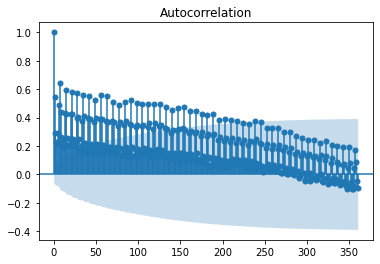

In [35]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diario, lags=30*12)
pyplot.show()


In [36]:
### from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import acf

nlags =  30*12 #Cantidad de ventana (probamos un año)
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

/home/lisandro/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [37]:
autocorr.shape

(361,)

Text(0.5, 0, 'lag')

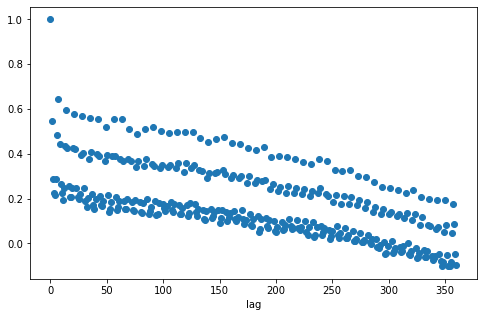

In [38]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

In [ ]:
# el correlograma es poco informativo, ya que la tendencia domina a las demás características.
#continuamos analizando pero debemos modificar la tendencia (como ya habiamos indicado en un principio)

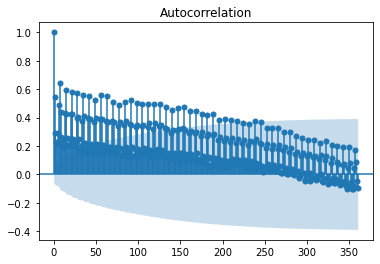

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 30*12)
plt.show()

In [42]:
#continuamos investigando... queremos ver cuales son los dias y horarios con mayor trafico. 

In [40]:
#Agruparemos por días para ver cuales fueron los que mayor transito tuvieron. 
exp = diario.groupby('fecha').sum('cantidad_pasos').sort_values(by= 'cantidad_pasos', ascending=False)

In [41]:
exp.head(20)

,cantidad_pasos
fecha,
2017-12-07,63127.0
2017-11-24,61594.0
2017-10-13,61421.0
2017-11-10,61382.0
2017-11-17,61259.0
2017-10-06,61099.0
2017-12-01,60985.0
2017-12-15,60280.0
2017-01-13,59651.0


In [63]:
#OBSERVACIONES = los dias con más autos coinciden con los ultimos 3 meses del año 2017, con más de 60.000 pasos diarios.

In [44]:
exp_2 = mensual.groupby('fecha').sum('cantidad_pasos').sort_values(by= 'cantidad_pasos', ascending=False)

In [45]:
exp_2.head(3)

,cantidad_pasos
fecha,
2017-10-31,1597356
2017-11-30,1581428
2017-01-31,1565260


In [67]:
#Vemos que los 3 meses con más trafico fueron octubre/17, noviembre/17, enero/17

In [46]:
#Vemos los horarios más concurridos
exp_3 = dataset.groupby('fecha').sum('cantidad_pasos').sort_values(by='cantidad_pasos', ascending=False)

In [47]:
exp_3.head()

,cantidad_pasos
fecha,
2017-10-05 18:00:00,4412
2017-11-17 14:00:00,4375
2017-12-07 16:00:00,4369
2017-10-13 15:00:00,4331
2017-11-24 15:00:00,4206


In [ ]:
#Vamos a eliminar la tendencia para poder modelar. 
#Detrending a time series is to remove the trend component from a time series.

Text(0.5, 1.0, 'Transito diario')

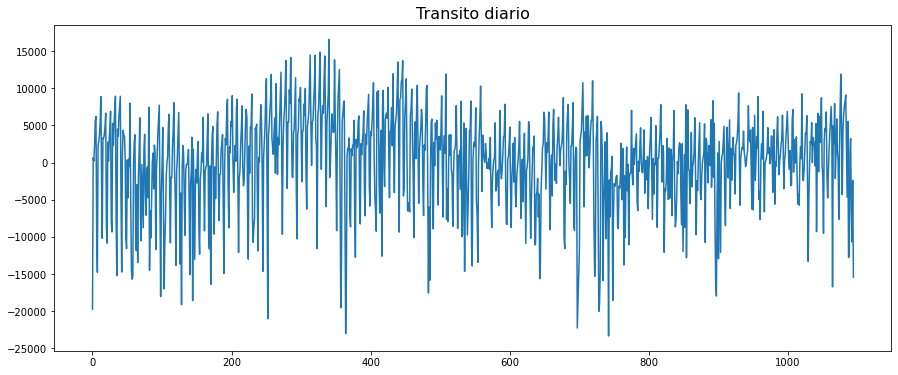

In [48]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(diario.cantidad_pasos.values)
plt.figure(figsize = (15,6))
plt.plot(detrended)
plt.title('Transito diario', fontsize=16)

In [49]:
detrended #vemos qué es? 'numpy.ndarray'

array([-19742.41553095,    655.39462241,    193.20477577, ...,
       -10677.72806344,  -2400.91791008, -15464.10775672])

Text(0.5, 1.0, 'Transito diario substrayendo tendencia')

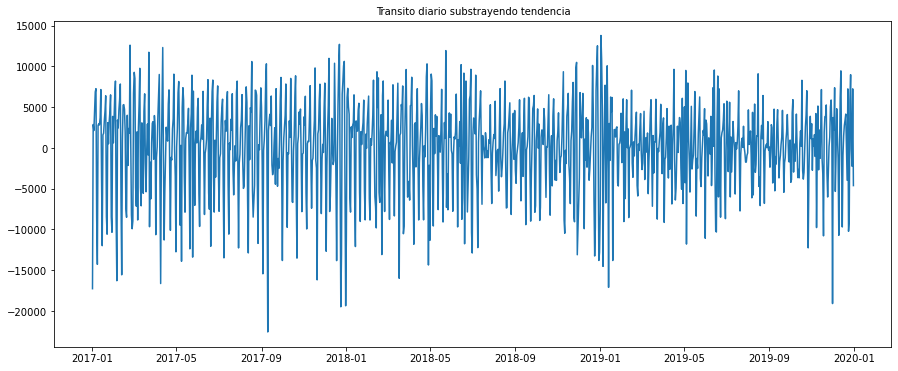

In [50]:
# Probamos otro método...
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(diario['cantidad_pasos'], model='multiplicative', extrapolate_trend='freq')
detrended_1 = diario.cantidad_pasos.values - result_mul.trend
plt.figure(figsize = (15,6))
plt.plot(detrended_1)
plt.title('Transito diario substrayendo tendencia', fontsize=10)

In [52]:
detrended_1.head()

fecha
2017-01-01   -17260.346939
2017-01-02     2871.234694
2017-01-03     2142.816327
2017-01-04     4427.714286
2017-01-05     6884.285714
Freq: D, Name: trend, dtype: float64

In [53]:
### from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import acf

nlags =  30*12 #Cantidad de ventana (probamos un año)
autocorr_1 = acf(detrended_1, nlags = nlags)

In [54]:
autocorr_1.shape

(361,)

Text(0.5, 0, 'lag')

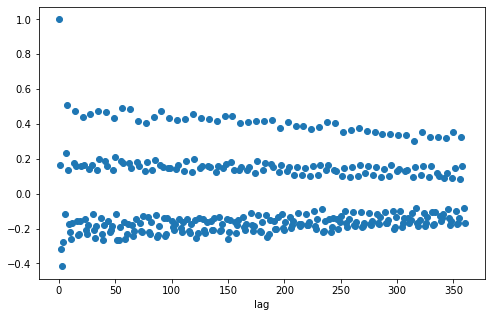

In [55]:
#analizamos nuevamente el grafico de la autocorrelación con la nueva serie sin tendencia

plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr_1)
plt.xlabel('lag')

In [ ]:
#Vamos a comparar....

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')
# result.plot()
# pyplot.show()

In [57]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [58]:
result.seasonal

fecha
2017-01-01   -6981.054869
2017-01-02   -1099.078371
2017-01-03     146.832228
2017-01-04    1967.807739
2017-01-05    3201.717538
                 ...     
2019-12-27    5222.345743
2019-12-28   -2458.570008
2019-12-29   -6981.054869
2019-12-30   -1099.078371
2019-12-31     146.832228
Freq: D, Name: seasonal, Length: 1095, dtype: float64

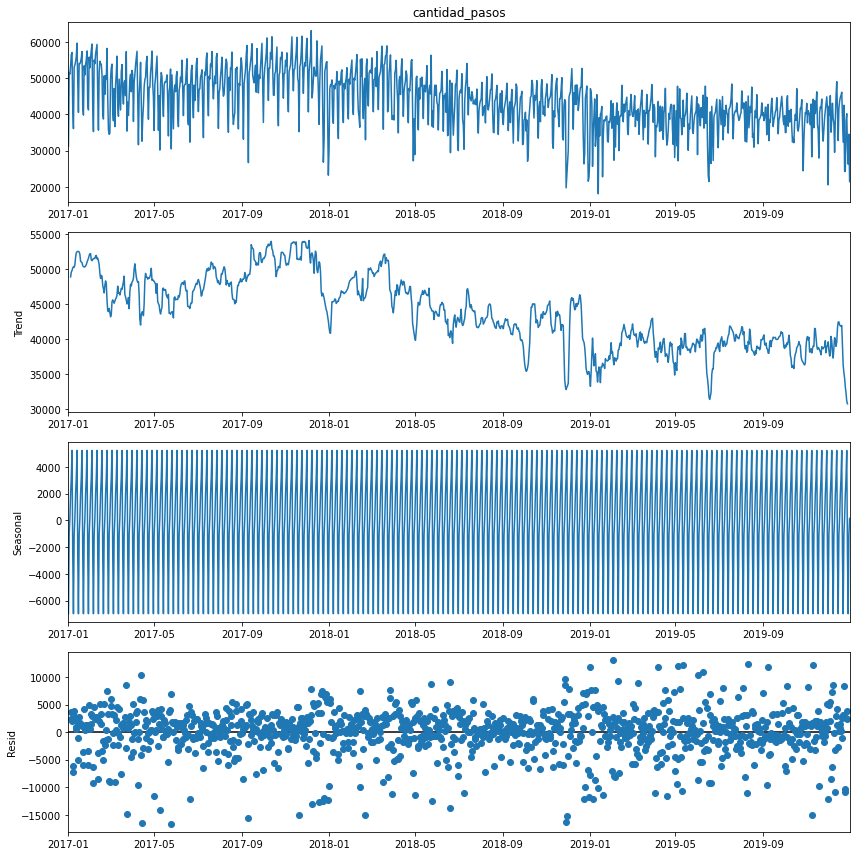

In [59]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

In [ ]:
#Vemos como originalmente teniamos una tendencia decreciente. Vemos el componente estacional. 
#OBS: ver a que se deben los errores... 

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(detrended_1, model='additive')
# result.plot()
# pyplot.show()

In [61]:
result.trend

fecha
2017-01-01           NaN
2017-01-02           NaN
2017-01-03           NaN
2017-01-04   -321.062682
2017-01-05    105.435860
                 ...    
2019-12-27     88.494898
2019-12-28    889.319242
2019-12-29           NaN
2019-12-30           NaN
2019-12-31           NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [62]:
result.seasonal

fecha
2017-01-01   -6971.329854
2017-01-02   -1088.378505
2017-01-03     155.951449
2017-01-04    1971.197198
2017-01-05    3191.346863
                 ...     
2019-12-27    5207.969760
2019-12-28   -2466.756912
2019-12-29   -6971.329854
2019-12-30   -1088.378505
2019-12-31     155.951449
Freq: D, Name: seasonal, Length: 1095, dtype: float64

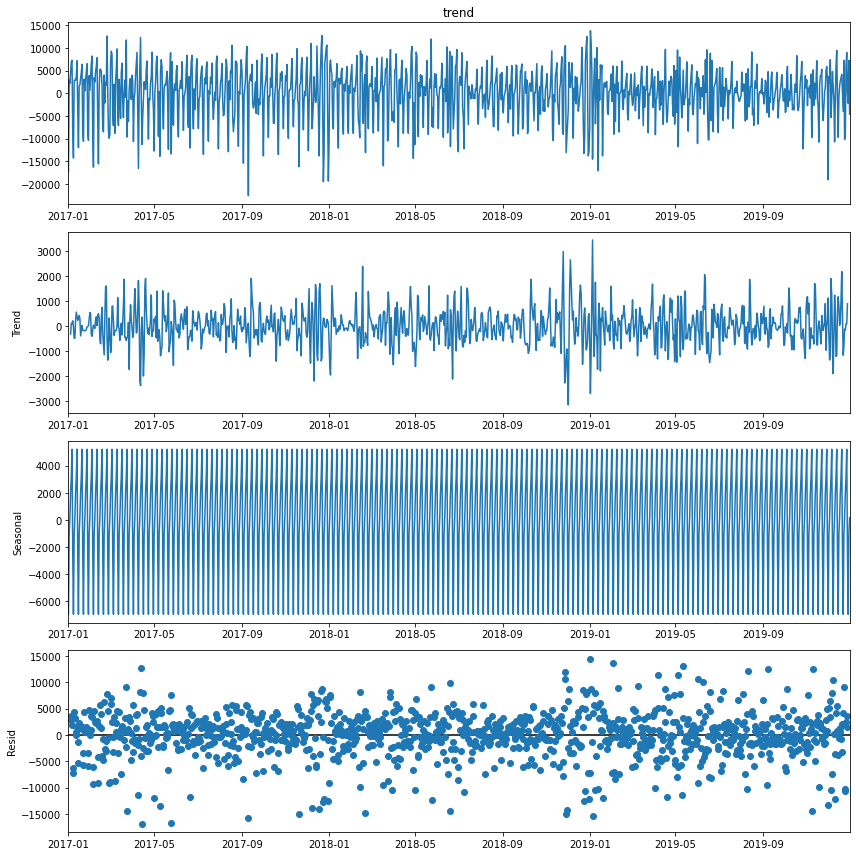

In [63]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

In [133]:
#Vemos como logramos eliminar la tendencia. 
#OBS!!! no podemos decir que el error tiene algun error especial (ruido blanco o caminaata)
#por el contrario, pareceria que los modelos estan bien!

In [134]:
#Tenemos el dataset listo para empezar a modelar!

## 2. Predicción a Futuro

### 2.1. One-Step Prediction

Vamos a entrenar un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo diaria de transito Utilizaremos los dos primeros años como conjunto de entrenamiento. Y el año 2019 como evaluación.

In [94]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [95]:
look_back = 365*1 # usamos dos (mod a uno) anios de datos para predecir el valor siguiente

In [96]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(729, 365) (729,)


In [97]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [98]:
print(X)

[[31183. 51568. 51093. ... 54556. 39969. 23229.]
 [51568. 51093. 53332. ... 39969. 23229. 30735.]
 [51093. 53332. 56486. ... 23229. 30735. 47130.]
 ...
 [47832. 35446. 21559. ... 24349. 38168. 40182.]
 [35446. 21559. 22599. ... 38168. 40182. 30681.]
 [21559. 22599. 27038. ... 40182. 30681. 26259.]]


In [99]:
print(y)

[30735.  47130.  48162.  47953.  49505.  39235.  37522.  48010.  47033.
 48454.  48229.  51792.  38943.  33319.  49201.  48048.  48340.  51548.
 52287.  41208.  37727.  48508.  47019.  48876.  49963.  52881.  41907.
 38733.  49726.  48296.  51377.  53306.  55008.  42606.  39956.  49983.
 49407.  51323.  53707.  56494.  46189.  40941.  39217.  36454.  55174.
 50497.  55336.  43231.  38824.  47717.  49936.  32992.  52997.  55294.
 44712.  42318.  51311.  51972.  52184.  51412.  55596.  46572.  40721.
 49620.  49692.  52810.  47659.  57329.  48079.  41317.  50217.  51112.
 51868.  54717.  58825.  50057.  35917.  53710.  53964.  56138.  56390.
 58905.  40697.  41661.  51369.  53358.  56407.  47490.  38627.  38603.
 39691.  38441.  51353.  52218.  54919.  48067.  43842.  34885.  49212.
 50463.  45484.  52474.  55330.  46853.  39439.  46399.  48089.  49309.
 52004.  50674.  41736.  37693.  47175.  46438.  49869.  54744.  55126.
 41633.  27169.  38739.  28870.  44380.  50125.  50518.  39135. 

In [100]:
N_train = 1*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 4*365 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(0, 365) (0,)
(729, 365) (729,)


In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 365)) while a minimum of 1 is required.

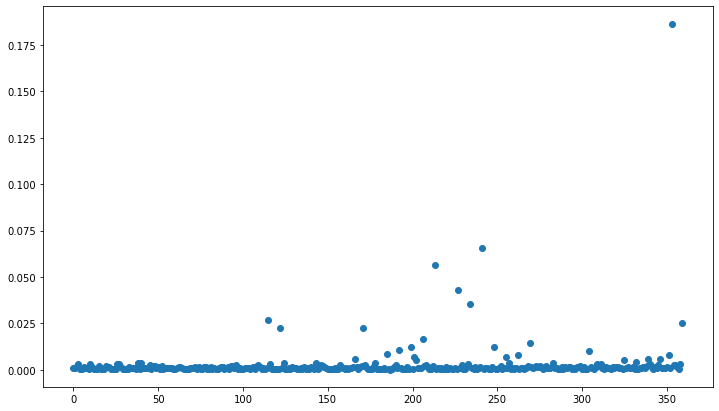

In [87]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
# for x in np.arange(3)*52:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [88]:
#Lo más importante para predecir son los ultimos dias del año. (los días anteriores)

In [89]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (0,) and (404,)

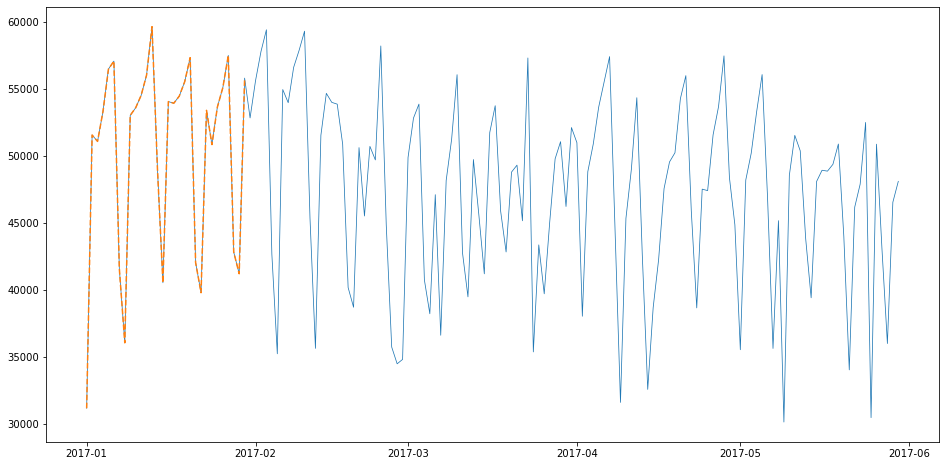

In [91]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

In [92]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1913.6171217970052
Error en Test: 4968.898357723856
